# Standard Bayesian Best-Worst Method Solver (1–9 Scale)

This Jupyter Notebook provides a solver for the Best-Worst Method (BWM) using standard inputs, where all pairwise comparisons are given on a 1–9 scale. The notebook guides you through the process of inputting your comparison matrices, running the BWM algorithm, and visualizing the results.

**Instructions for Use:**
- Each code cell can be executed independently.
- To run a cell, select it and press `Shift+Enter`. This will execute the cell and display the output below it.
- Follow the workflow from top to bottom, ensuring that variables and modules are defined before they are used in subsequent cells.

Use this notebook to analyze your multi-criteria decision-making problems with the BWM approach, leveraging the provided visualizations and analysis tools.

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../../src"))

import numpy as np 
from BayesMCDM import BWM
from BayesMCDM.Visualizer import CredalRanking, WeightVisualizer

/Users/majidmohammadi/surfdrive/Research/MCDM/BayesMCDM/.venv/lib/python3.9/site-packages/stan/plugins.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Bayesian Best-Worst Method

The Best-Worst Method (BWM) is a popular Multi-Criteria Decision-Making (MCDM) technique used to determine the relative importance (weights) of a set of criteria. In BWM, the decision-maker first identifies the most important (Best) and least important (Worst) criteria. Then, two sets of pairwise comparisons are provided:

- **Best-to-Others (B/O):** The decision-maker rates how much more important the Best criterion is compared to each of the other criteria.
- **Others-to-Worst (O/W):** The decision-maker rates how much more important each criterion is compared to the Worst criterion.

For group decision-making, the responses from all participants are aggregated. Specifically, all Best-to-Others vectors are combined into a matrix (denoted as `a_b`), and all Others-to-Worst vectors are combined into another matrix (denoted as `a_w`). **Each row of `a_b` and `a_w` corresponds to the responses from a single decision maker.** These matrices serve as the input for the Bayesian BWM, which then computes the optimal weight distributions for each criterion, reflecting the collective preferences of the group.

There is also a variable named `criteria_names`, which contains the names of the criteria in the same order as in the matrices. This variable will be used later for visualization, ensuring that plots and charts are clearly labeled with the appropriate criterion names.

**If you want to solve your own problem**, you only need to change the values of `a_b` and `a_w` to reflect your own pairwise comparisons, and then execute the rest of the cells in this notebook.

In [2]:
a_b =  ([
    [ 3, 4, 6, 1, 5, 2, 9, 7],
    [ 1, 2, 8, 4, 5, 3, 9, 6],
    [ 2, 2, 3, 1, 5, 5, 9, 8],
    [ 2, 1, 8, 2, 9, 3, 8, 8],
    [ 2, 4, 9, 1, 4, 3, 5, 5],
    [ 1, 2, 9, 1, 3, 5, 5, 4],
    ])

a_w =  ([
    [ 7, 6, 4, 9, 5, 8, 1, 3],
    [ 9, 8, 2, 5, 4, 5, 1, 3],
    [ 8, 8, 5, 9, 5, 5, 1, 2],
    [ 8, 9, 2, 8, 1, 8, 2, 2],
    [ 8, 6, 1, 9, 6, 7, 4, 4],
    [ 9, 8, 1, 9, 7, 5, 5, 6],
    ])
criteria_names = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

## Solving the Bayesian BWM

In this section, we solve the Bayesian Best-Worst Method (BWM) using the standard 1–9 scale for pairwise comparisons. The matrices `a_b` (Best-to-Others) and `a_w` (Others-to-Worst) are provided as inputs, representing the aggregated judgments from all decision makers. 

The Bayesian BWM algorithm then samples from the posterior distributions of the criteria weights, capturing the uncertainty and variability in the group’s preferences. This probabilistic approach provides a more comprehensive understanding of the relative importance of each criterion compared to traditional deterministic methods.
```

In [3]:
bwm = BWM.StandardBWM( AB=a_b, AW=a_w)
bwm.sampling()

Building...
Sampling started...
Sampling finished.


## Sumamry Statistics
In the `bwm` object, several statistics are available from the posterior distribution computed by the Bayesian BWM algorithm:

- **`bwm.aggregated_weight`**: The mean of the aggregated posterior weight distribution for each criterion, representing the overall group consensus.
- **`bwm.aggregated_weight_samples`**: The full set of posterior samples for the aggregated weights, capturing the uncertainty and variability in the group’s preferences.
- **`bwm.dm_weight`**: The mean posterior weights for each criterion, calculated separately for each decision maker (DM).
- **`bwm.dm_weight_samples`**: The full set of posterior samples for the weights of each criterion, provided separately for each DM.

The first two attributes summarize the aggregated (group-level) results, while the last two provide detailed statistics for each individual decision maker.

In [5]:
print("the mean of aggregated posterior weights for each criterion (group consensus):")
for name, weight in zip(criteria_names, bwm.aggregated_weight):
    print(f"{name}: {weight:.4f}")

the mean of aggregated posterior weights for each criterion (group consensus):
C1: 0.2027
C2: 0.1705
C3: 0.0605
C4: 0.2185
C5: 0.0911
C6: 0.1300
C7: 0.0546
C8: 0.0720


# Visualization of Bayesian BWM Results

- **Credal Ranking:**  
    The credal ranking visualizes the probability that one criterion is more important than another, based on the posterior distributions of their weights. This approach quantifies the strength of preference between criteria, providing a probabilistic ranking rather than a single deterministic order.  
    Multiple plots are provided for credal ranking, and you can use any of them in your report according to your preference. The plots are customizable—refer to the documentation or other visualization pages for more details on available options.

- **Weight Distributions:**  
    Since the Bayesian BWM produces a distribution for each criterion's weight (rather than a single value), we can visualize these distributions to understand the uncertainty and variability in the estimated importance of each criterion. Several types of weight distribution plots are available, and you may choose whichever best fits your reporting needs. These plots are also customizable; see the visualization documentation for further customization options.

## Credal Ranking 
For credal ranking visualization, it is necessary to provide the samples from the posterior distribution of the criteria weights, along with the `criteria_names` for labeling. In this example, we use the aggregated posterior weight samples (`bwm.aggregated_weight_samples.T`) and the corresponding `criteria_names` to plot the credal ranking, which reflects the group-level consensus on the relative importance of each criterion.

The `CredalRanking` object contains a variable `probs`, which is a matrix of computed probabilities. Each entry `probs[i, j]` represents the probability that criterion *i* is more important than criterion *j* according to the posterior samples.

In [6]:
credal_ranking = CredalRanking(bwm.aggregated_weight_samples, criteria_names=criteria_names) 

# Print the credal ranking probability matrix as a DataFrame for better readability
print(credal_ranking.credal_probs())

      C1    C2    C3    C4    C5    C6    C7    C8
C1  0.00  0.84  1.00  0.33  1.00  0.99  1.00  1.00
C2  0.16  0.00  1.00  0.08  1.00  0.91  1.00  1.00
C3  0.00  0.00  0.00  0.00  0.07  0.00  0.63  0.26
C4  0.67  0.92  1.00  0.00  1.00  1.00  1.00  1.00
C5  0.00  0.00  0.93  0.00  0.00  0.06  0.96  0.82
C6  0.01  0.09  1.00  0.00  0.94  0.00  1.00  0.99
C7  0.00  0.00  0.37  0.00  0.04  0.00  0.00  0.17
C8  0.00  0.00  0.74  0.00  0.18  0.01  0.83  0.00


### Default Plot 
By calling the `plot` function from the `credal_ranking` object, we generate a weighted directed graph that visually represents the probabilistic ranking of the criteria. In this graph, each node corresponds to a criterion, and a directed edge from node A to node B (A → B) indicates that criterion A is more likely to be more important than criterion B based on the posterior distributions.

There are two ways to display the probabilities on the graph:

- **If `show_probs` is `False`**: The probabilities are encoded by the line style of the edges, as indicated in the legend. Different line styles represent different probability ranges.
- **If `show_probs` is `True`**: The actual probability values are displayed as weights on the edges, providing a quantitative measure of confidence for each pairwise comparison.

This visualization helps to intuitively understand both the ranking and the strength of preference among the criteria.

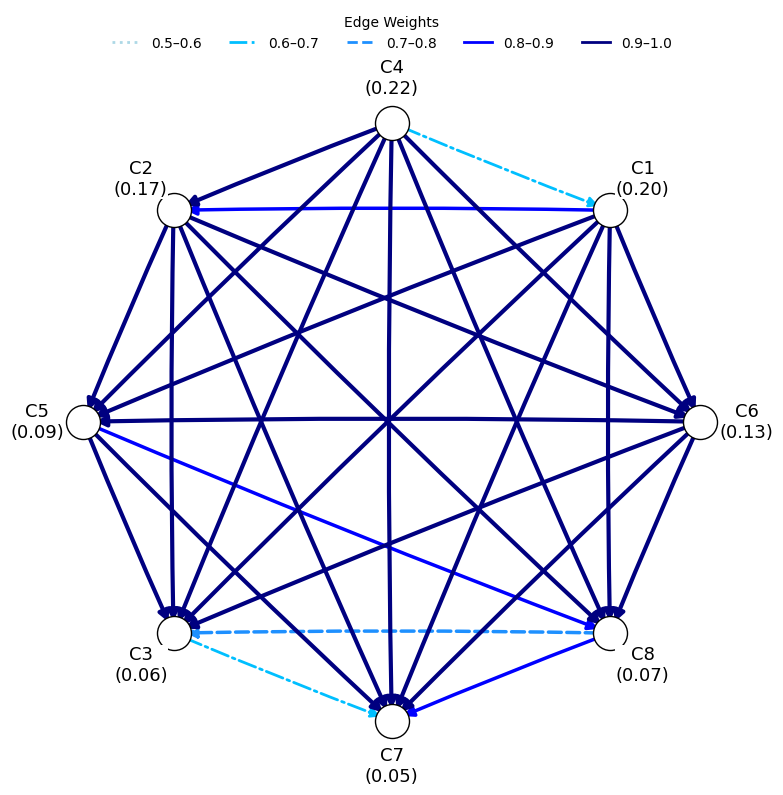

In [7]:
credal_ranking.plot(show_probs=False)

### Ranking plot 
The `plot_ranking` function creates a simpler graph to show the ranking of criteria. It arranges the criteria from most important (at the top) to least important (at the bottom). If a criterion is above another and there is no edge between them, it means the top one is more important with 100% certainty. Edges are only drawn when the probability is less than 1, and the probability value is shown on the edge. This makes the plot easier to read and helps you quickly see where there is uncertainty in the ranking.

The `plot_ranking` function has several parameters to customize the appearance of the plot:

- **graph_layout**: Sets the direction of the graph. Use `"TD"` for top-down (most important at the top) or `"LR"` for left-to-right (most important on the left).
- **node_fontsize**: Sets the font size for the criterion names (nodes).
- **node_boldfont**: If `True`, makes the node labels bold.
- **edge_fontsize**: Sets the font size for the probability labels on the edges.
- **edge_boldfont**: If `True`, makes the edge labels bold.

These options help you adjust the style and orientation of the ranking plot for better readability.

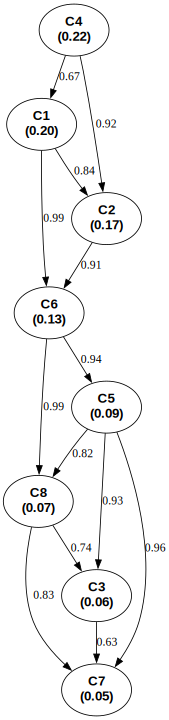

In [8]:
credal_ranking.plot_ranking(graph_layout="TD",node_fontsize=16, node_boldfont=True,
                             edge_fontsize=16, edge_boldfont=True)

  ## Weight Distribution
In Bayesian BWM, each criterion's weight is represented by a distribution rather than a single value, reflecting the uncertainty in the group’s preferences. To visualize these distributions, we use the `WeightVisualizer` class, which requires the posterior weight samples and the corresponding `criteria_names` as input. In this example, we use the aggregated posterior weight samples (`bwm.aggregated_weight_samples.T`) to generate several types of weight distribution plots. These visualizations help us understand both the central tendency and the variability of the estimated importance for each criterion.

In [9]:
weight_visualizer = WeightVisualizer(bwm.aggregated_weight_samples, criteria_names=criteria_names)

### Histogram of Weight Samples: `plot_distributions`

The first plot, generated by the `plot_distributions` method, displays the histogram of the posterior weight samples for each criterion. This visualization shows the distribution of possible weight values, reflecting the uncertainty in the estimated importance of each criterion. The **red dashed line** in each subplot marks the mean (average) of the distribution, providing a clear reference for the central tendency of the weights.

**Customizable Parameters:**

- `ncols=3`: Sets the number of columns in the grid layout of the subplots. For example, with 8 criteria and `ncols=3`, the plots will be arranged in 3 columns and 3 rows.
- `font_size=12`: Specifies the font size for axis labels and titles within each subplot, improving readability.
- `font_bold=False`: If set to `True`, makes the font bold for all text in the plots; otherwise, regular font weight is used.
- `xlim=[0, 0.4]`: Defines the range of the x-axis for all histograms, ensuring consistent scaling and easier comparison across criteria.

These parameters allow you to tailor the appearance and layout of the histogram plots to best fit your reporting or presentation needs.

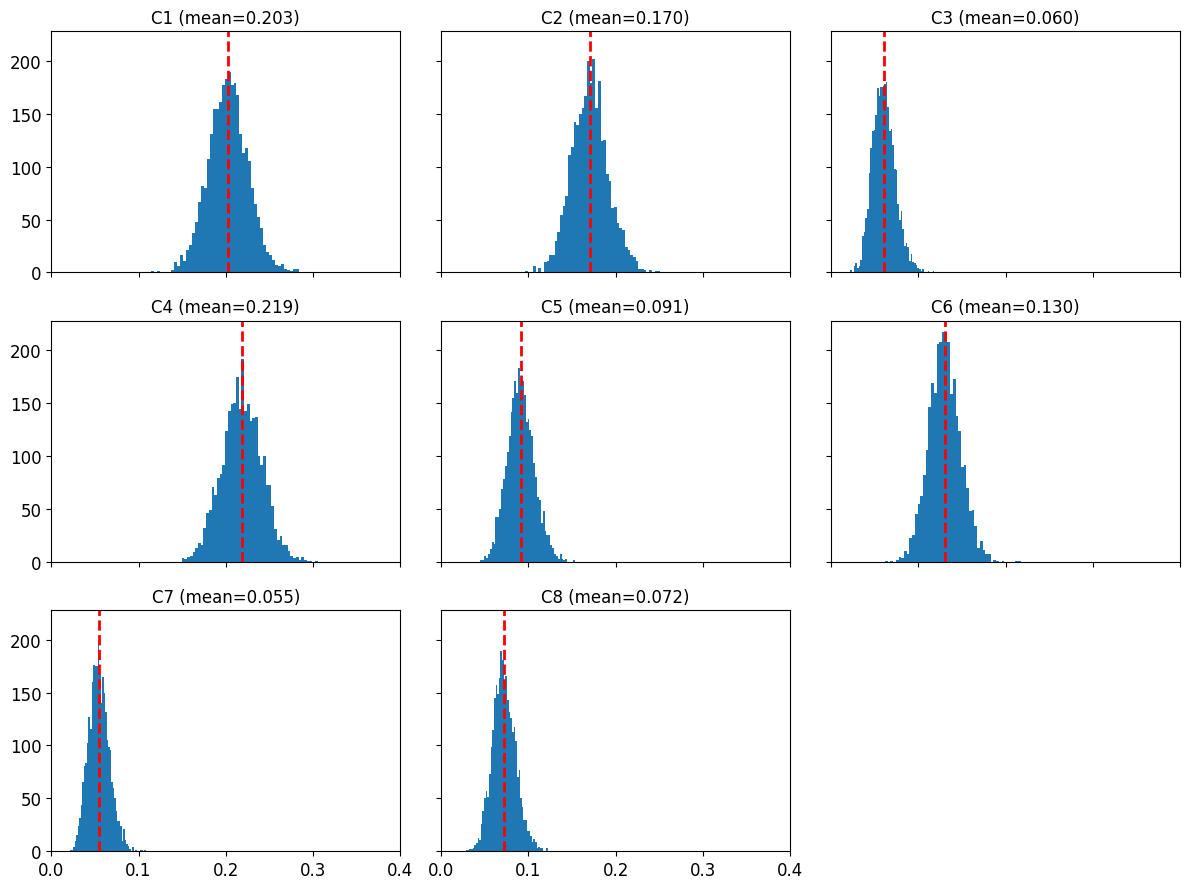

In [10]:
weight_visualizer.plot_distributions(ncols=3, font_size=12, font_bold=False, xlim=[0,0.4])

### Ridge Plot of Weight Distributions

The `ridge_plot` method in the `WeightVisualizer` class displays the posterior weight distributions for all criteria as overlapping density curves, stacked vertically. This visualization, also known as a "joyplot," allows for easy comparison of the shape, spread, and central tendency of each criterion's weight distribution.

**Key Features:**
- Each curve represents the posterior distribution of a criterion’s weight.
- Criteria are labeled on the y-axis for clarity.
- The plot highlights differences in uncertainty and the relative importance of each criterion.
- The `font_bold` parameter can be set to `True` to make axis labels and titles bold for improved readability.

This plot is especially useful for visually comparing the uncertainty and ranking of criteria in Bayesian BWM analyses.

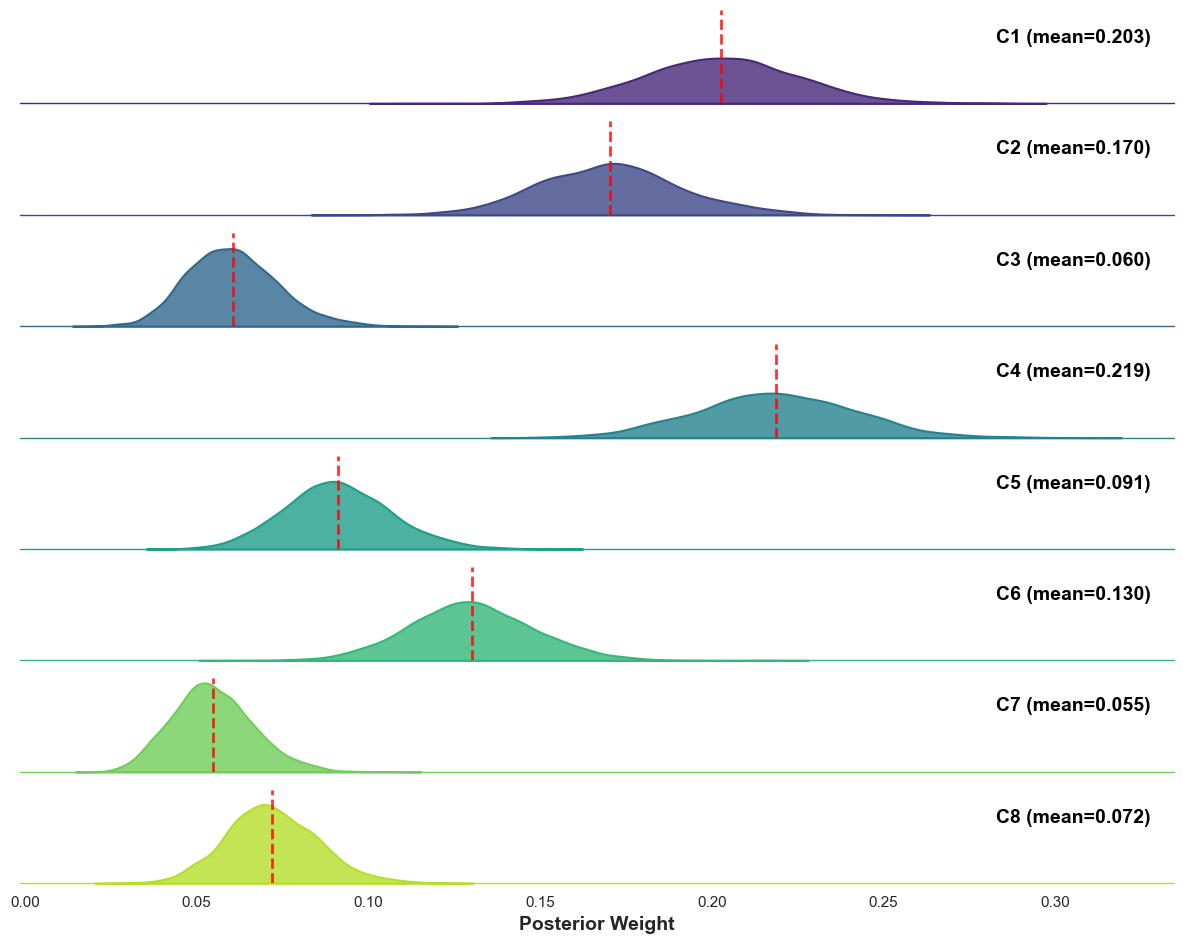

In [11]:
weight_visualizer.ridge_plot(font_bold=True)

## Jackplot of Weight Distributions

The `vertical_jakplot` method in the `WeightVisualizer` class provides a "jackplot" visualization, where the x-axis represents the criteria and the y-axis shows the distribution of weights for each criterion, estimated using a kernel density estimator (KDE). This plot allows you to compare the uncertainty and central tendency of the weights across all criteria in a single, compact figure.

- **Blue dots**: Indicate the mean (average) of each criterion's weight distribution, providing a quick visual reference for the central value.
- **KDE curves**: Show the shape and spread of the posterior weight distributions for each criterion.

**Customizable Parameters:**
- `ylim`: Sets the limits of the y-axis (e.g., `ylim=[0, 0.4]`) to control the visible range of weight values.
- `font_size`: Adjusts the font size for axis labels and tick marks.
- `font_bold`: If `True`, makes all text in the plot bold for improved readability.

This visualization is useful for quickly assessing both the ranking and the uncertainty of the criteria weights in Bayesian BWM analyses.

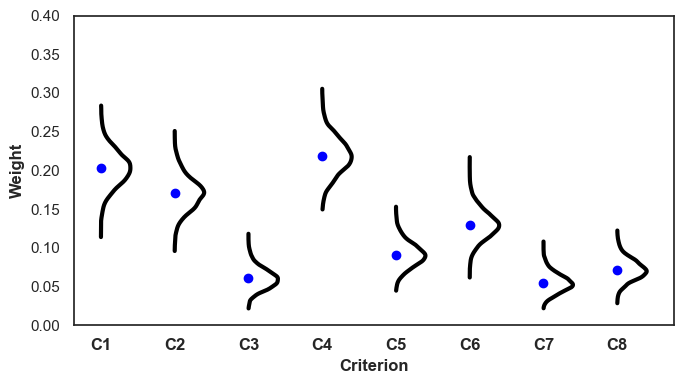

In [12]:
weight_visualizer.vertical_jakplot(font_size=12, font_bold=True, ylim=[0, .4])

# AI-Generated Report

In [13]:
print(credal_ranking.generate_ai_report_prompt())

You are an expert in multi-criteria decision analysis. Given the following criteria, their mean aggregated weights, and the credal ranking probability matrix, write a concise report that:
- Explains which criteria are most and least important.
- Discusses the extent to which one criterion is more important than another, using the credal probabilities.
- Highlights any cases where the ranking is uncertain or close.

Background:
The credal ranking probability matrix quantifies, for each pair of criteria, the probability that one is more important than the other, based on uncertainty in the estimated weights. Higher probabilities indicate greater confidence in the ranking.

Criteria and their mean aggregated weights:
- C1: 0.2027
- C2: 0.1705
- C3: 0.0605
- C4: 0.2185
- C5: 0.0911
- C6: 0.1300
- C7: 0.0546
- C8: 0.0720

Credal ranking probabilities (P[i > j]):
Rows: more important; Columns: less important
Each entry [i, j] shows the probability that criterion i is more important than crit

In [ ]:
def generate_ai_report_prompt(criteria_names, aggregated_weights, credal_probs):
    """
    Generates a prompt for an AI model to write a report on the importance of criteria
    based on their mean aggregated weights and the credal ranking probability matrix.

    Args:
        criteria_names (list of str): Names of the criteria.
        aggregated_weights (np.ndarray): Mean aggregated weights for each criterion.
        credal_probs (np.ndarray): Matrix where entry [i, j] is the probability that
                                   criterion i is more important than criterion j.

    Returns:
        str: A prompt string for an AI model.
    """
    # Prepare criteria and weights table
    table = "Criteria and their mean aggregated weights:\n"
    for name, weight in zip(criteria_names, aggregated_weights):
        table += f"- {name}: {weight:.4f}\n"

    # Prepare credal ranking summary
    ranking_summary = "Credal ranking probabilities (P[i > j]):\n"
    ranking_summary += (
        "Rows: more important; Columns: less important\n"
        "Each entry [i, j] shows the probability that criterion i is more important than criterion j, "
        "based on the uncertainty in the estimated weights.\n"
        "A value close to 1 means high confidence that i is more important than j; "
        "a value close to 0.5 means the ranking between i and j is uncertain.\n"
    )
    header = "      " + "  ".join([f"{n:>5}" for n in criteria_names]) + "\n"
    ranking_summary += header
    for i, name_i in enumerate(criteria_names):
        row = f"{name_i:>5} "
        for j in range(len(criteria_names)):
            row += f"{credal_probs[i, j]:5.2f} "
        ranking_summary += row + "\n"

    # Compose the prompt
    prompt = (
        "You are an expert in multi-criteria decision analysis. "
        "Given the following criteria, their mean aggregated weights, and the credal ranking probability matrix, "
        "write a concise report that:\n"
        "- Explains which criteria are most and least important.\n"
        "- Discusses the extent to which one criterion is more important than another, using the credal probabilities.\n"
        "- Highlights any cases where the ranking is uncertain or close.\n\n"
        "Background:\n"
        "The credal ranking probability matrix quantifies, for each pair of criteria, the probability that one is more important than the other, "
        "based on uncertainty in the estimated weights. Higher probabilities indicate greater confidence in the ranking.\n\n"
        f"{table}\n"
        f"{ranking_summary}\n"
        "Please provide a clear, structured summary suitable for decision makers."
    )
    return prompt